In [147]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.constants as sc

Seaborn setup.

In [148]:
#sns.set_context('paper') # try: 'talk', 'poster', 'notebook'
sns.set_theme(style="ticks")

sns_palette_historic = ["m"]
sns_palette_modern = ["g"]

sns_xlim = (-0.1, 1.1)
sns_ylim = (-0.1, 9.1)

sns_plot_size = (8*sc.golden_ratio, 8)

## Dataframe

Load dataframes as generated by the other two notebooks.

In [149]:
with open("niner.pkl", mode="rb") as pkl_file:
    df_niner = pickle.load(pkl_file)
with open("single.pkl", mode="rb") as pkl_file:
    df_single = pickle.load(pkl_file)

In [150]:
means = []
for img in df_niner[df_niner["type"] == "H"]["id"].unique():
    means.append((
        img,
        "H",
        np.mean(df_niner[df_niner["id"] == img]["normalise"]),
        np.mean(df_single[df_single["id"] == img]["normalise"])
    ))
    
df = pd.DataFrame(means)
df.columns = ["id", "type", "niner", "single"]
df = df.sort_values(by='niner', ascending=True)


In [151]:
means = []
for img in df_niner[df_niner["type"] == "I"]["id"].unique():
    means.append((
        img,
        "I",
        np.mean(df_niner[df_niner["id"] == img]["normalise"]),
        np.mean(df_single[df_single["id"] == img]["normalise"])
    ))
    
df_concat = pd.DataFrame(means)
df_concat.columns = ["id", "type", "niner", "single"]


In [152]:
df = pd.concat((df, df_concat.sort_values(by='niner', ascending=True)))

Simple sanity checks.

In [168]:
assert len(df[df["type"] == "I"]) == 15
assert len(df[df["type"] == "H"]) == 30

## Correlation

Correlation coefficient: r = -0.32169218842889025.
Correlation significant: False with p = 0.08300149951107867.


0.08300149951107867

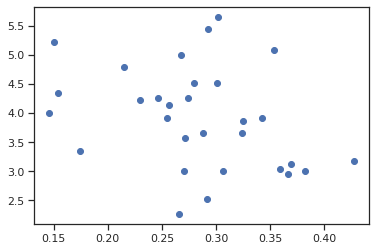

In [172]:
plt.scatter(
    df[df["type"] == "H"]["niner"],
    df[df["type"] == "H"]["single"]
)

r, p = stats.pearsonr(
   df[df["type"] == "H"]["niner"],
   df[df["type"] == "H"]["single"]
)
print(f'Correlation coefficient: r = {r}.')
print(F"Correlation significant: {np.less(p, 0.05)} with p = {p}.")
p

Correlation coefficient: r = -0.634910250178952.
Correlation significant: True with p = 0.010992941041294666.


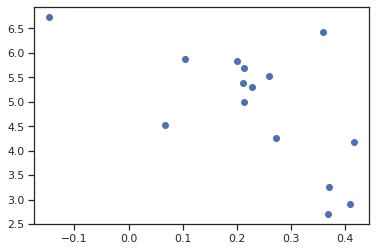

In [173]:
plt.scatter(
    df[df["type"] == "I"]["niner"],
    df[df["type"] == "I"]["single"]
)

r, p = stats.pearsonr(
    df[df["type"] == "I"]["niner"],
    df[df["type"] == "I"]["single"]
)
print(f'Correlation coefficient: r = {r}.')
print(F"Correlation significant: {np.less(p, 0.05)} with p = {p}.")

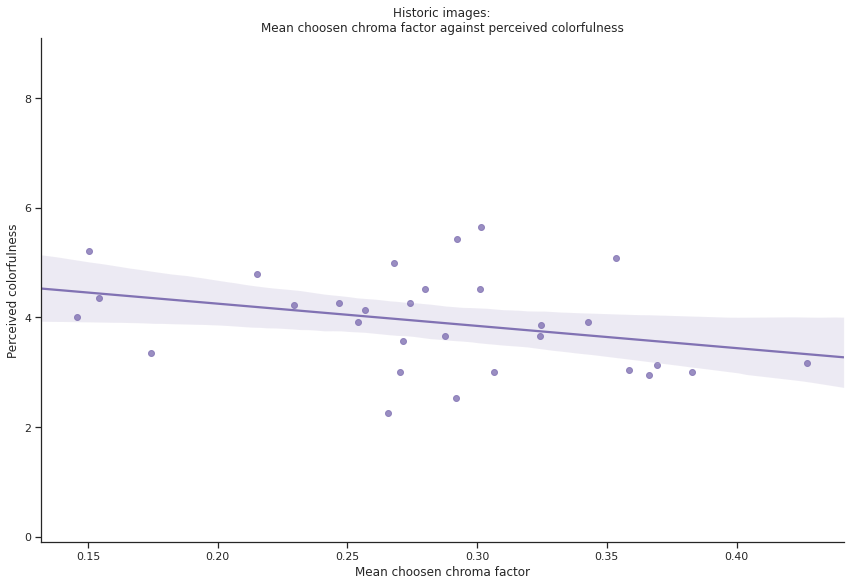

In [162]:
g = sns.lmplot(
    x="niner",
    y="single",
    data=df[df["type"] == "H"],
    #kind="reg",
    truncate=False,
    legend=False,
    height=7,
    hue="type",
    palette=[sns_palette_historic[0]]
    )

#g.set(xlim=(-0.1, 0.5))
g.set(ylim=sns_ylim)
g.figure.set_size_inches(sns_plot_size)

g.set(title="Historic images:\nMean choosen chroma factor against perceived colorfulness")
g.set(xlabel="Mean choosen chroma factor")
g.set(ylabel="Perceived colorfulness")

g.savefig("regression_historic.png", dpi=400)

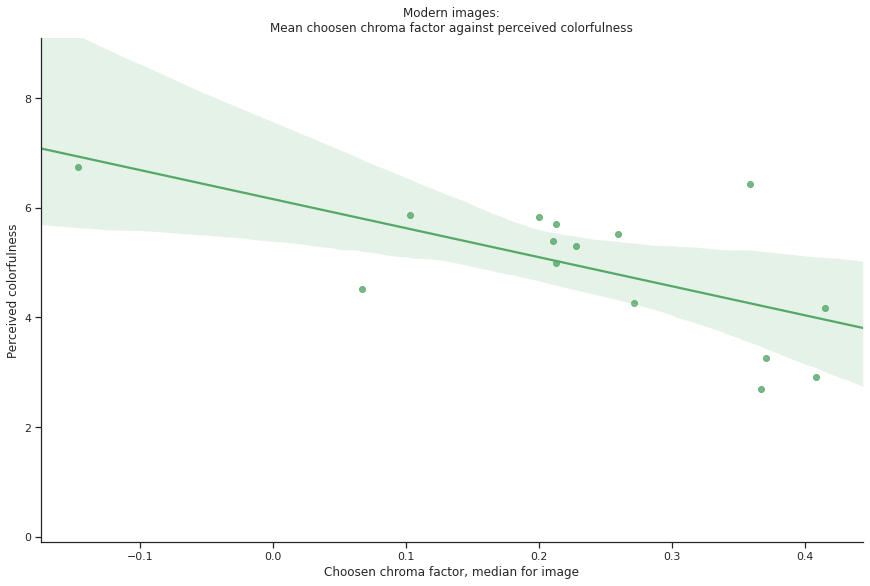

In [163]:
g = sns.lmplot(
    x="niner",
    y="single",
    data=df[df["type"] == "I"], # Select modern images.
    truncate=False,
    legend=False,
    height=7,
    hue="type",
    palette=[sns_palette_modern[0]]
    )

g.figure.set_size_inches(sns_plot_size)
g.set(ylim=sns_ylim)
g.set(title="Modern images:\nMean choosen chroma factor against perceived colorfulness")
g.set(xlabel="Choosen chroma factor, median for image")
g.set(ylabel="Perceived colorfulness")

g.savefig("regression_modern.png", dpi=400)